In [15]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold



In [17]:
df = pd.read_csv(r"C:\Users\Abolarinwa\Documents\10 ALYTICS PHYTON CLASS\Online Payment Fraud Detection.csv")

In [18]:
# Display the first five rows in the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [19]:
df.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [21]:
df.describe

<bound method NDFrame.describe of          step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1            

In [22]:
# Missing Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<AxesSubplot:>

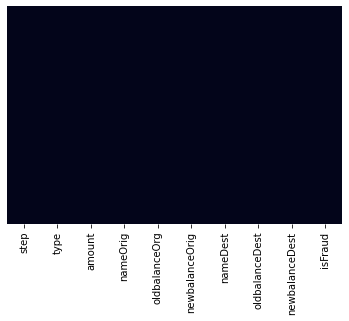

In [23]:
# Visualizing missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='type', ylabel='count'>

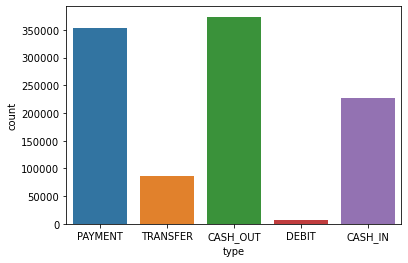

In [24]:
# What type of transation was used the most?
sns.countplot(x='type',data=df)

<AxesSubplot:xlabel='type', ylabel='amount'>

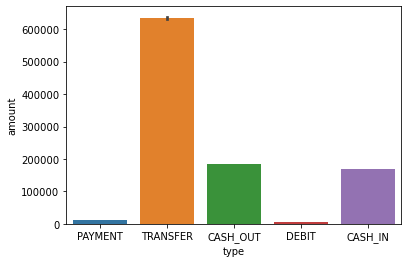

In [25]:
# What type of transation had the most amount in value?
sns.barplot(x='type',y='amount',data=df)

<AxesSubplot:xlabel='isFraud', ylabel='count'>

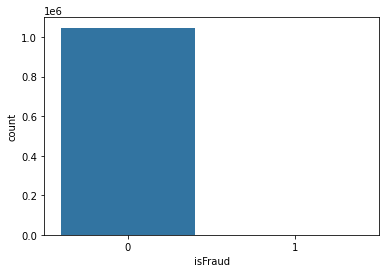

In [26]:
# The above graph indicates that the dataset is highly unbalanced.
sns.countplot(x='isFraud',data=df)

<AxesSubplot:xlabel='step', ylabel='Count'>

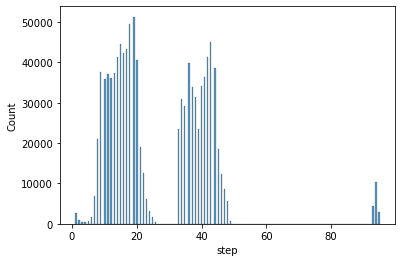

In [27]:
# What is the distribution of the step feature - You will observe you dont have a normal distribution
sns.histplot(data=df,x='step')

<AxesSubplot:xlabel='step'>

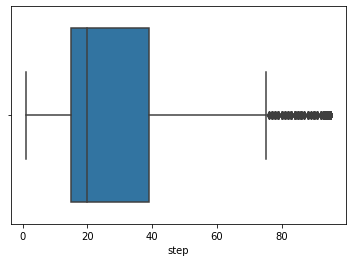

In [28]:
# The boxplot shows that we have outliers present in the step column
sns.boxplot(data=df,x='step')

<AxesSubplot:xlabel='amount', ylabel='Count'>

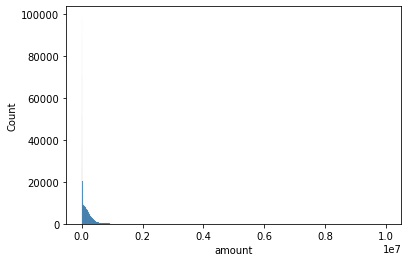

In [29]:
# The distribution of the amount feature is not symmentrical
sns.histplot(data=df,x='amount')

<AxesSubplot:xlabel='amount'>

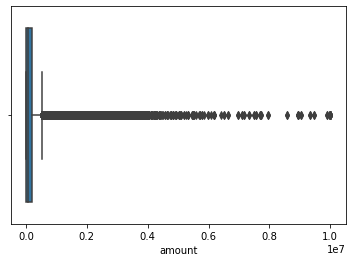

In [30]:
# The amount column has a lot outliers
sns.boxplot(data=df,x='amount')

C:\Users\Abolarinwa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

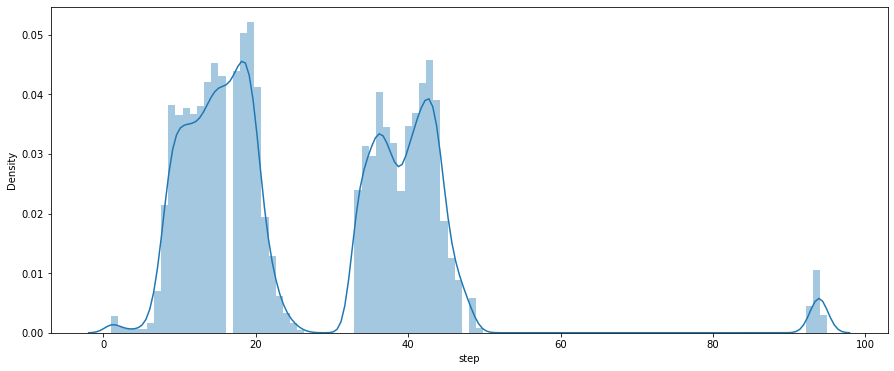

In [31]:
# Distribution of the Step column
plt.figure(figsize=(15,6))
sns.distplot(df['step'],bins=100)

C:\Users\Abolarinwa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

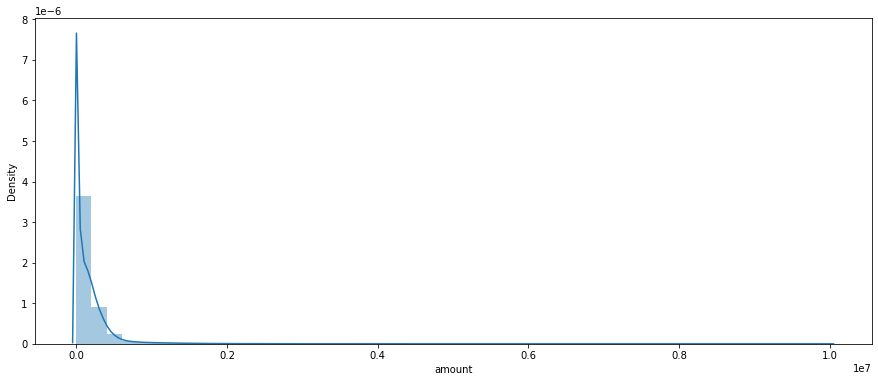

In [32]:
# Distribution of the amount column
plt.figure(figsize=(15,6))
sns.distplot(df['amount'])

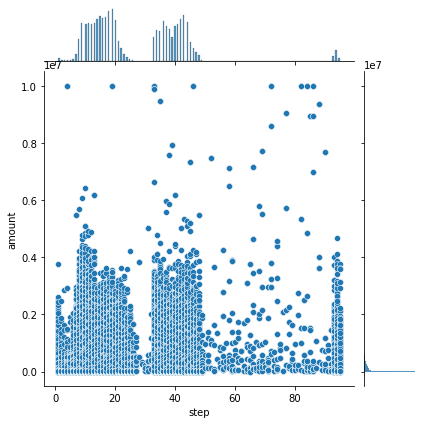

In [33]:
# A joint plot investigating the relationship between Step and Amount
sns.jointplot(x='step',y='amount',data=df)

<AxesSubplot:>

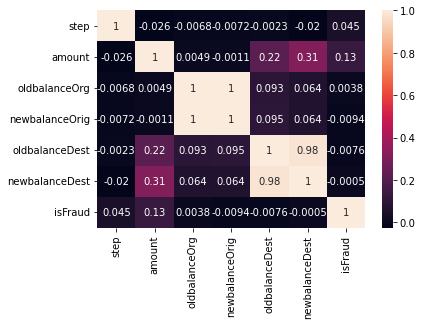

In [34]:
# Using the heatmap to showcase the relationship between each columns
sns.heatmap(df.corr(),annot=True)

In [35]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [36]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [37]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [38]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1.
#Normalization: shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
#Robust Scaler: similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# create a new column for scaled columns
df["Scaled_step"] = rob_scaler.fit_transform(df["step"].values.reshape(-1,1))
df["Scaled_amount"] = rob_scaler.fit_transform(df["amount"].values.reshape(-1,1))
df["Scaled_oldbalanceOrg"] = rob_scaler.fit_transform(df["oldbalanceOrg"].values.reshape(-1,1))
df["Scaled_newbalanceOrig"] = rob_scaler.fit_transform(df["newbalanceOrig"].values.reshape(-1,1))
df["Scaled_oldbalanceDest"] = rob_scaler.fit_transform(df["oldbalanceDest"].values.reshape(-1,1))
df["Scaled_newbalanceDest"] = rob_scaler.fit_transform(df["newbalanceDest"].values.reshape(-1,1))

df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Scaled_step,Scaled_amount,Scaled_oldbalanceOrg,Scaled_newbalanceOrig,Scaled_oldbalanceDest,Scaled_newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-0.791667,-0.329858,1.128013,0.918078,-0.137978,-0.189823
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-0.791667,-0.369416,0.038400,0.111024,-0.137978,-0.189823
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-0.791667,-0.377765,-0.115784,0.000000,-0.137978,-0.189823
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-0.791667,-0.377765,-0.115784,0.000000,-0.114852,-0.189823
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-0.791667,-0.320789,0.187000,0.171168,-0.137978,-0.189823


In [39]:
df.drop(["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"], axis=1, inplace=True)

df.head()

,type,isFraud,Scaled_step,Scaled_amount,Scaled_oldbalanceOrg,Scaled_newbalanceOrig,Scaled_oldbalanceDest,Scaled_newbalanceDest
0,PAYMENT,0,-0.791667,-0.329858,1.128013,0.918078,-0.137978,-0.189823
1,PAYMENT,0,-0.791667,-0.369416,0.038400,0.111024,-0.137978,-0.189823
2,TRANSFER,1,-0.791667,-0.377765,-0.115784,0.000000,-0.137978,-0.189823
3,CASH_OUT,1,-0.791667,-0.377765,-0.115784,0.000000,-0.114852,-0.189823
4,PAYMENT,0,-0.791667,-0.320789,0.187000,0.171168,-0.137978,-0.189823


In [40]:
#Splitting the Data - (Original Dataframe)
#I am going to perform Random Undersampling and Oversampling to test the models on the original dataset and noy the testing set creating during sampling

data = df.copy()

print(round(df["isFraud"].value_counts()[0]/len(df) * 100,2), "% of the data are not fraudulent transactions")
print(round(df["isFraud"].value_counts()[1]/len(df) * 100,2), "% of the data are fraudulent")

#drop the label
y = df["isFraud"]
x = df.drop("isFraud", axis=1)

sample = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sample.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

99.89 % of the data are not fraudulent transactions
0.11 % of the data are fraudulent
Train: [ 209639  209640  209641 ... 1048572 1048573 1048574] Test: [     0      1      2 ... 480463 480464 481250]
Train: [      0       1       2 ... 1048572 1048573 1048574] Test: [209639 209640 209641 ... 777627 782395 782396]
Train: [      0       1       2 ... 1048572 1048573 1048574] Test: [ 419187  419188  419189 ... 1030354 1030355 1030356]
Train: [      0       1       2 ... 1048572 1048573 1048574] Test: [ 628844  628845  628846 ... 1030583 1030584 1030585]
Train: [      0       1       2 ... 1030583 1030584 1030585] Test: [ 838419  838420  838421 ... 1048572 1048573 1048574]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99891162 0.00108838]
[0.99890804 0.00109196]


In [72]:
#Random Under-Sampling
#This basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

print("Non-Fraud transactions = ", df["isFraud"].value_counts()[0])
print("Fraud transactions = ", df["isFraud"].value_counts()[1])
print("----------------------------------------")

df = df.sample(frac=1)

#Amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:1142]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

print("Result from random undersampling")
print("Non-Fraud transactions = ", new_df["isFraud"].value_counts()[0])
print("Fraud transactions = ", new_df["isFraud"].value_counts()[1])

Non-Fraud transactions =  1047433
Fraud transactions =  1142
----------------------------------------
Result from random undersampling
Non-Fraud transactions =  1142
Fraud transactions =  1142


In [42]:
new_df.head()

,type,isFraud,Scaled_step,Scaled_amount,Scaled_oldbalanceOrg,Scaled_newbalanceOrig,Scaled_oldbalanceDest,Scaled_newbalanceDest
1030281,TRANSFER,1,1.333333,0.258333,0.822767,0.000000,-0.137978,-0.189823
387413,PAYMENT,0,-0.125000,-0.172134,-0.017597,0.000000,-0.137978,-0.189823
354108,CASH_OUT,0,-0.125000,1.456479,1.431346,0.000000,-0.137385,0.132432
587574,CASH_OUT,0,0.541667,-0.368825,-0.006294,0.075364,0.200959,0.081895
1030377,TRANSFER,1,1.666667,-0.177851,0.179185,0.000000,-0.137978,-0.189823


In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 1030281 to 1030681
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   2284 non-null   object 
 1   isFraud                2284 non-null   int64  
 2   Scaled_step            2284 non-null   float64
 3   Scaled_amount          2284 non-null   float64
 4   Scaled_oldbalanceOrg   2284 non-null   float64
 5   Scaled_newbalanceOrig  2284 non-null   float64
 6   Scaled_oldbalanceDest  2284 non-null   float64
 7   Scaled_newbalanceDest  2284 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 160.6+ KB


C:\Users\Abolarinwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


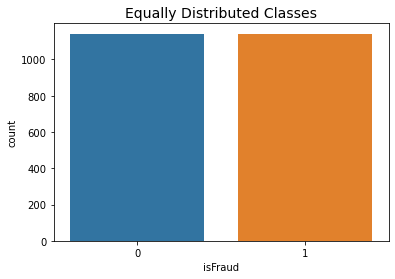

In [44]:
sns.countplot('isFraud', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [78]:
#Model Application
#Simple and efficient tools for predictive data analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

ModuleNotFoundError: No module named 'xgboost'

In [68]:
#8 Machine learning  Algorithms will be applied to the dataset
classifiers = [[XGBClassifier(),'XGB Classifier'], 
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(),'SGD Classifier'], 
               [SVC(),'SVC'],
               [GaussianNB(), "Naive Bayes"], 
               [DecisionTreeClassifier(random_state = 42), "Decison tree"],
               [LogisticRegression(), 'Logistic Regression']
              ]

NameError: name 'XGBClassifier' is not defined

In [77]:
df_1 = new_df.drop("isFraud", axis=1)
label = new_df["isFraud"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(new_df, label, test_size=0.2)

score_list = {}
cross_val_list = {}
roc_auc_list = {}
accuracy_score_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_test, y_test).mean()
    roc_auc = roc_auc_score(y_test, pred)
    acuracy = accuracy_score(y_test, pred)
    
    score_list[model_name] = ([str(round(score*100, 2)) + '%'])
    cross_val_list[model_name] = ([str(round(cross_val*100, 2)) + '%'])
    roc_auc_list[model_name] = ([str(round(roc_auc*100, 2)) + '%'])
    accuracy_score_list[model_name] = ([str(round(acuracy*100, 2)) + '%'])
   
    if model_name != classifiers[-1][1]:
       print('')

NameError: name 'classifiers' is not defined

In [75]:
print("Accuracy Score")
sl = pd.DataFrame(score_list)
sl.head()

Accuracy Score


""


In [74]:
print("Cross Validation")
sl = pd.DataFrame(cross_val_list)
sl.head()

Cross Validation


""


In [73]:
print("roc_auc_list")
sl = pd.DataFrame(roc_auc_list)
sl.head()

roc_auc_list


""
